# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).
Here below the description of the dataset:

![image.png](attachment:image.png)

1- Load data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
df.shape

(614, 13)

In [3]:
assert df.shape == (614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [5]:
df.drop("Loan_ID", axis = 1, inplace = True)
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N":0})

In [6]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [7]:
col_names = [f for f in df.columns]
col_types = [df[col].dtype for col in df.columns]
nb_null = [df[col].isnull().sum() for col in df.columns]
nb_unique = [df[col].nunique() for col in df.columns]
unique_vals = [' - '.join(df[col].astype('str')[~pd.isnull(df[col])].unique().tolist()) for col in df.columns]

In [12]:
for i, txt in enumerate(unique_vals):
    if nb_unique[i] >= 10:
        unique_vals[i] = txt[:20] + ' - ...'       

In [15]:
stats = pd.DataFrame(index = col_names,data = {'type': col_types, '# null': nb_null,'# unique': nb_unique, 'unique values': unique_vals})
stats

,type,# null,# unique,unique values
Gender,object,13,2,Male - Female
Married,object,3,2,No - Yes
Dependents,object,15,4,0 - 1 - 2 - 3+
Education,object,0,2,Graduate - Not Graduate
Self_Employed,object,32,2,No - Yes
ApplicantIncome,int64,0,505,5849 - 4583 - 3000 - - ...
CoapplicantIncome,float64,0,287,0.0 - 1508.0 - 2358. - ...
LoanAmount,float64,22,203,128.0 - 66.0 - 120.0 - ...
Loan_Amount_Term,float64,14,10,360.0 - 120.0 - 240. - ...
Credit_History,float64,50,2,1.0 - 0.0


In [11]:
stats.loc['Loan_Amount_Term']['unique values']

'360.0 - 120.0 - 240.0 - 180.0 - 60.0 - 300.0 - 480.0 - 36.0 - 84.0 - 12.0'

4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [276]:
df['Married'].fillna("Yes", inplace = True)
df.dropna(inplace = True)
print(df.shape)

(480, 12)


In [277]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

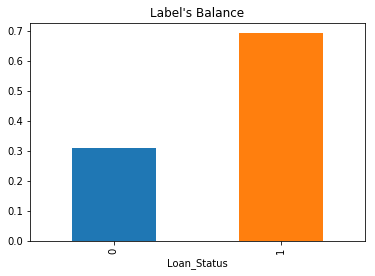

In [278]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Label's Balance")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [279]:
print ('approval rate =', round(df.Loan_Status.mean()*100), "%")

approval rate = 69 %


In [308]:
# You could get an accuracy of 69% by always predicting "1".

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [280]:
def make_bar_plot(df, column):
    df.groupby(column).mean()['Loan_Status'].plot(kind="barh", title="Approval rate per "+str(column), figsize = (8, 4))
    plt.show()

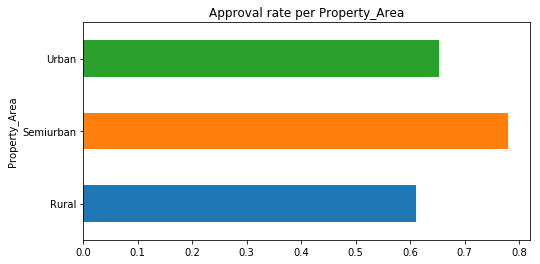

In [281]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [282]:
def make_box_plot(df, column):  
    df.boxplot(column = column, by = 'Loan_Status', figsize=(8, 4))   
    plt.show()

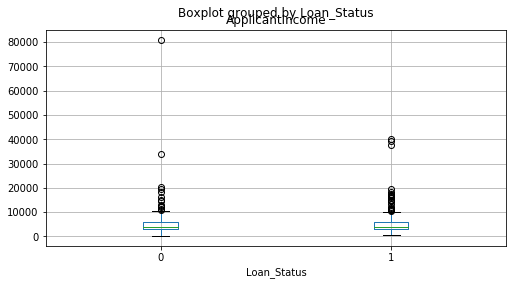

In [283]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************


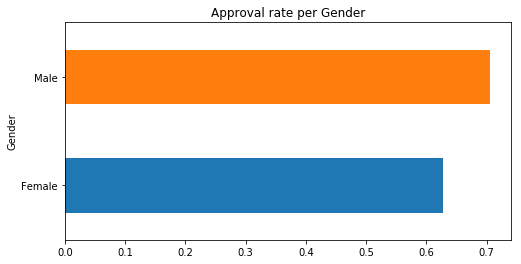

****************** Married *******************


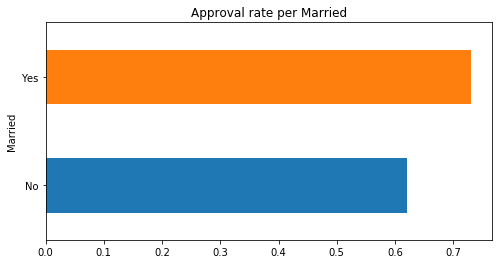

****************** Dependents *******************


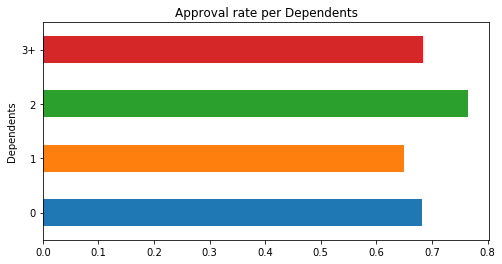

****************** Education *******************


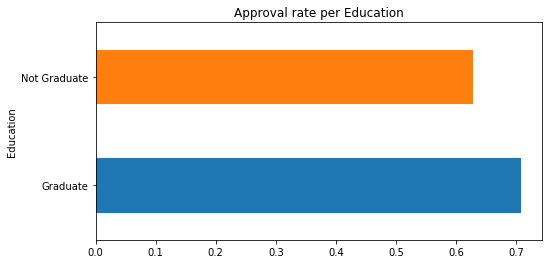

****************** Self_Employed *******************


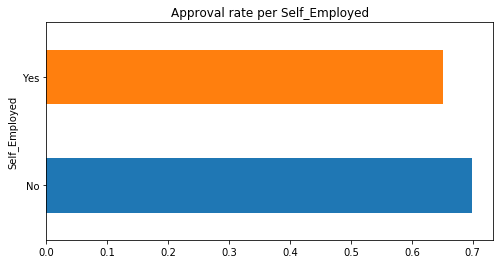

****************** ApplicantIncome *******************


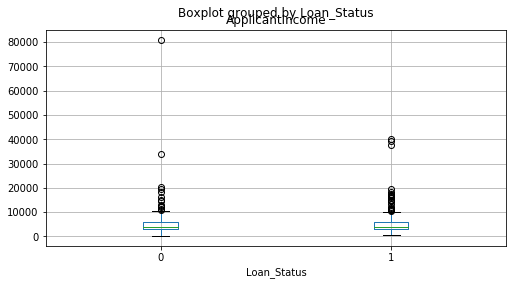

****************** CoapplicantIncome *******************


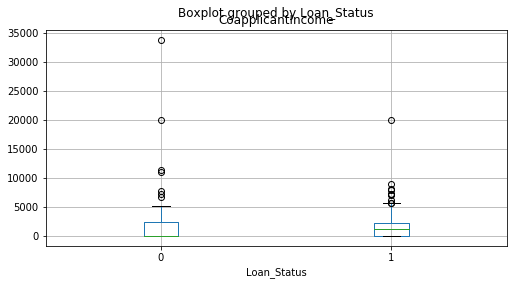

****************** LoanAmount *******************


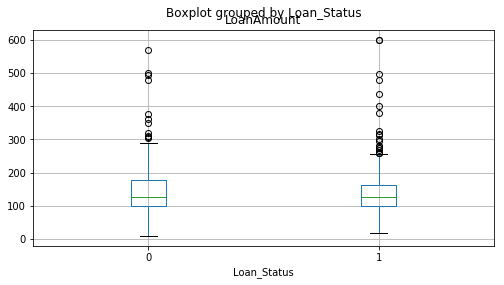

****************** Loan_Amount_Term *******************


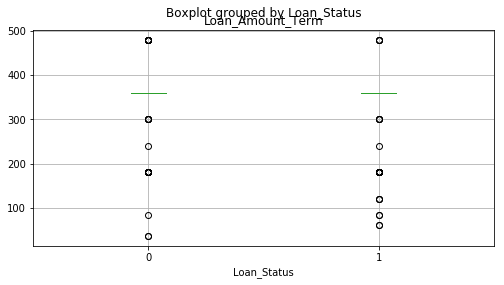

****************** Credit_History *******************


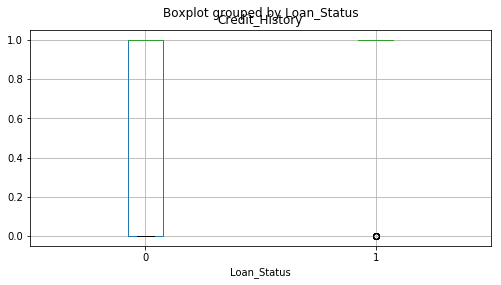

****************** Property_Area *******************


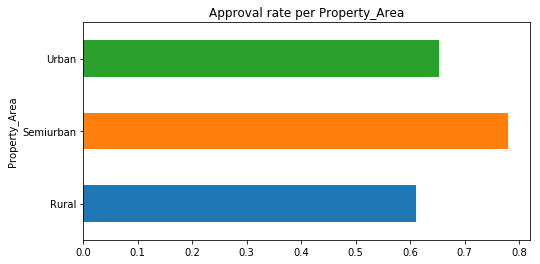

In [284]:
for col in df.columns[:-1]:
    print(f'****************** {col} *******************')
    if df[col].dtype == 'O':
        make_bar_plot(df, col)
    else:
        make_box_plot(df, col)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [285]:
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'])

print the head of df

In [286]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [289]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [290]:
for col in [f for f in df.columns if df[f].dtype == "object"]:
    df[col] = pd.Categorical(df[col]).codes

Print the head of df

In [291]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [301]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [302]:
y = df.Loan_Status
X = df.drop(['Loan_Status'], axis=1, inplace =False)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [304]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() 
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8035714285714286
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [305]:
from sklearn import metrics
predicted = clf.predict(X_test)
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[22 25]
 [ 4 93]]
             precision    recall  f1-score   support

          0       0.85      0.47      0.60        47
          1       0.79      0.96      0.87        97

avg / total       0.81      0.80      0.78       144



In [306]:
precision_0 = 21 /(21 + 4)
recall_1 = 93 / (93 + 4)
print ('precision_0 =', precision_0)
print ('recall_1 =',recall_1)

precision_0 = 0.84
recall_1 = 0.9587628865979382


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [307]:
# evaluate the model using 5-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=5)
print (scores)
print ('scores mean =', scores.mean(), 'scores std =', scores.std())

[0.87417219 0.86092715 0.8590604  0.91428571 0.85915493]
scores mean = 0.8735200768592174 scores std = 0.02114844591238175


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of accuracy.